# 1.1 - Intro Machine Learning - Aprendizaje Supervisado - Regresion

![venn_ml](images/venn_ml.png)

![ext_sklearn](images/ext_sklearn.jpeg)

![sklearn](images/sklearn.png)

### WorkFlow


1. [Obtener datos](#1.-Obtener-Datos)
2. [Definir objetivo](#2.-Definir-Objetivo)
3. [Limpieza de datos (unidades, outliers, one-hot, etc..)(**)](#3.-Limpieza-de-Datos)
4. [Definir modelo (regresión, clasificación, ...)](#4.-Modelo)
5. [Entrenar (hiperparámetros, validación, ...) (**)](#5.-Entrenamiento)
6. [Predecir (testear)](#6.-Predicción)
7. [Evaluación](#7.-Evaluación)
8. [Si hay mucho error volver a (**)](#WorkFlow)
9. [Super-Bonus H2O](#8.-H2O)

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import pylab as plt
import seaborn as sns

%matplotlib inline

### 1. Obtener Datos

**explicacion:**
    
+ carat:	peso del diamante (quilates)

+ cut:	calidad del corte (Fair, Ideal, Good, Very Good, Premium)

+ color: color (D (mejor) a J (peor))

+ clarity: claridad (I1 (peor), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (mejor)) 

+ table: ancho del corte superior del diamante

+ x: largo en mm

+ y: ancho en mm

+ z: alto en mm

+ depth:	2*z/(x+y)

+ price:	precio en dolares USA


![dia](images/dia.jpg)

In [2]:
df=pd.read_csv('../data/diamonds.csv')

df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.21,Premium,J,VS2,62.4,58.0,4268,6.83,6.79,4.25
1,0.32,Very Good,H,VS2,63.0,57.0,505,4.35,4.38,2.75
2,0.71,Fair,G,VS1,65.5,55.0,2686,5.62,5.53,3.65
3,0.41,Good,D,SI1,63.8,56.0,738,4.68,4.72,3.00
4,1.02,Ideal,G,SI1,60.5,59.0,4882,6.55,6.51,3.95


### 2. Definir Objetivo


```El objetivo del ejercicio consiste en predecir el precio de los diamantes basándonos en datos como el peso, el color, el corte o la claridad.```

### 3. Limpieza de Datos

El proceso de limpieza es el habitual:

+ Valores nulos
+ Datos inconsistentes 
+ Datos duplicados...

Todo esto implica realizar también un **EDA**. Además de eso, es necesario arreglar los datos, proceso llamado `data wrangling`. Este proceso consiste en preparar los datos de manera adecuada para que el modelo de machine learning "entienda" los datos de manera óptima. Por ejemplo, los datos de corte, color y claridad son datos categóricos que están en formato string, habrá que cambiar estos datos para alimentar al modelo, las máquinas solo entienden de números 🤣.

Este proceso no es solo necesario sino fundamental. **Todo está en los datos.**

In [3]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    40455 non-null  float64
 1   cut      40455 non-null  object 
 2   color    40455 non-null  object 
 3   clarity  40455 non-null  object 
 4   depth    40455 non-null  float64
 5   table    40455 non-null  float64
 6   price    40455 non-null  int64  
 7   x        40455 non-null  float64
 8   y        40455 non-null  float64
 9   z        40455 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 9.2 MB


In [4]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
carat,40455.0,NaN,NaN,NaN,0.797706,0.475544,0.2,0.4,0.7,1.04,4.5
cut,40455,5,Ideal,16220,NaN,NaN,NaN,NaN,NaN,NaN,NaN
color,40455,7,G,8455,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clarity,40455,8,SI1,9749,NaN,NaN,NaN,NaN,NaN,NaN,NaN
depth,40455.0,NaN,NaN,NaN,61.752841,1.431725,43.0,61.0,61.8,62.5,79.0
table,40455.0,NaN,NaN,NaN,57.446133,2.233535,43.0,56.0,57.0,59.0,95.0
price,40455.0,NaN,NaN,NaN,3928.444469,3992.416147,326.0,945.0,2397.0,5331.0,18823.0
x,40455.0,NaN,NaN,NaN,5.729392,1.124453,0.0,4.71,5.69,6.54,10.23
y,40455.0,NaN,NaN,NaN,5.732819,1.14665,0.0,4.72,5.71,6.54,58.9
z,40455.0,NaN,NaN,NaN,3.537154,0.697062,0.0,2.91,3.52,4.035,8.06


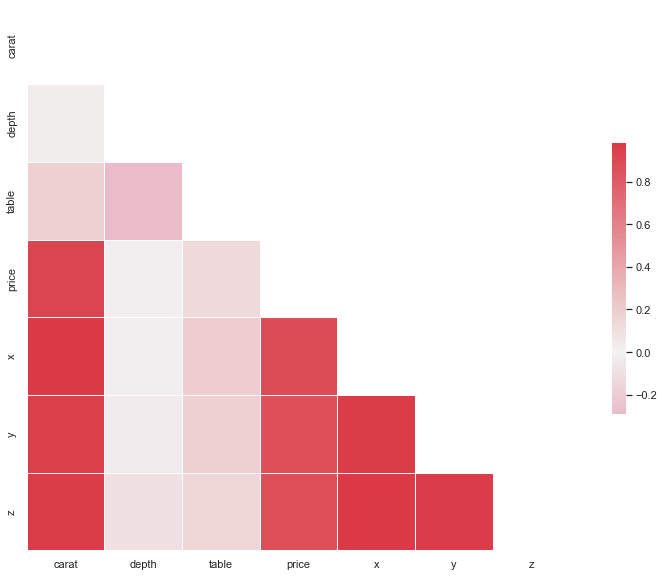

In [6]:
# buscando colinealidad

plt.figure(figsize=(15, 10))

sns.set(style='white')

mask=np.triu(np.ones_like(df.corr(), dtype=bool))

cmap=sns.diverging_palette(0, 10, as_cmap=True)


sns.heatmap(df.corr(),
           mask=mask,
          cmap=cmap,
          center=0,
          square=True,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5});

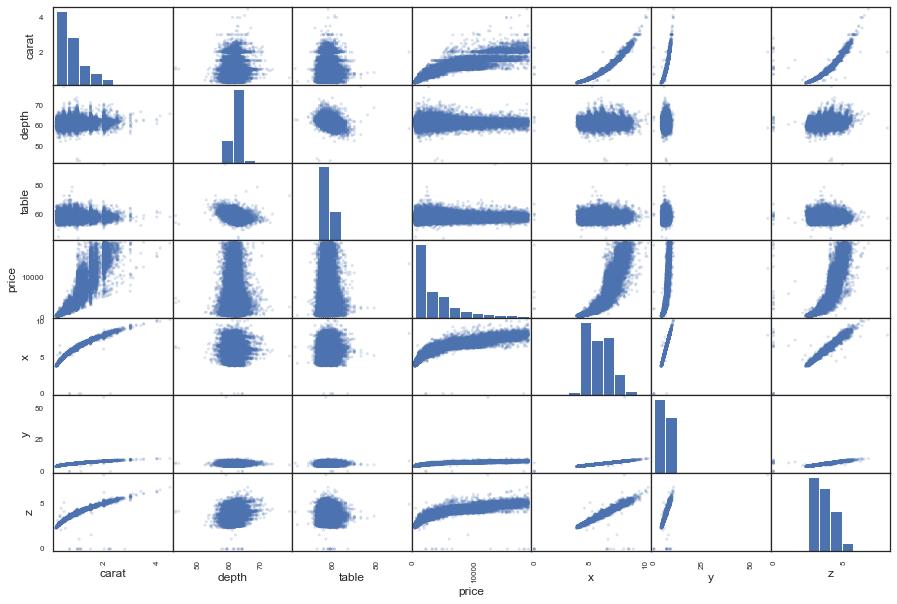

In [7]:
# scatter matrix

pd.plotting.scatter_matrix(df, figsize=(15, 10), alpha=0.2);

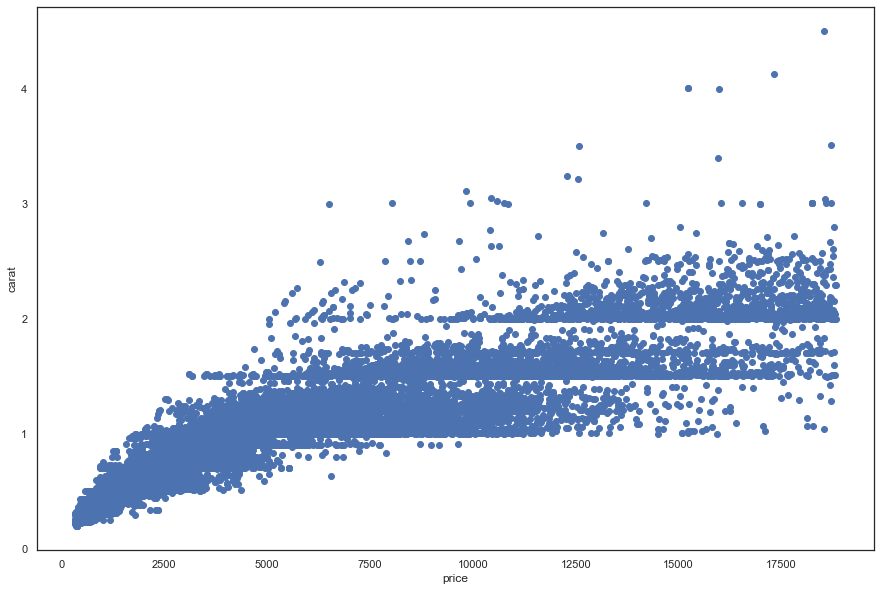

In [8]:
plt.figure(figsize=(15,10))

plt.scatter(df.price, df.carat)
plt.xlabel('price')
plt.ylabel('carat');

In [9]:
# transformando carat con boxcox

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.boxcox.html

from scipy.stats import boxcox

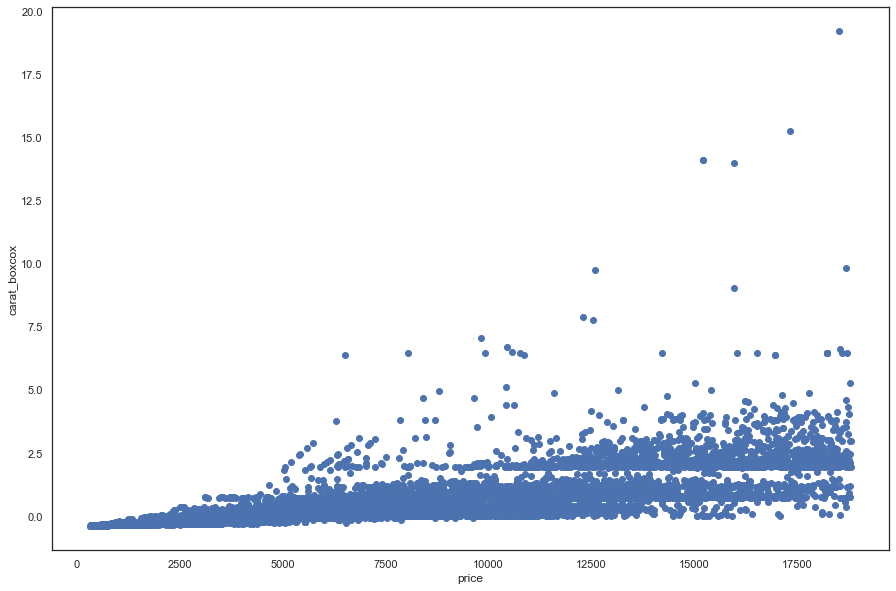

In [13]:
plt.figure(figsize=(15,10))


carat_boxcox=boxcox(df.carat, lmbda=2.618033)

plt.scatter(df.price, carat_boxcox)
plt.xlabel('price')
plt.ylabel('carat_boxcox');

## Reflexión : ¿Cómo podemos asegurarnos de que de verdad son diamantes?

1 carat es igual a 200mg de diamante.

Densidad del diamante es 2,26 gm/cm3

In [14]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.21,Premium,J,VS2,62.4,58.0,4268,6.83,6.79,4.25
1,0.32,Very Good,H,VS2,63.0,57.0,505,4.35,4.38,2.75
2,0.71,Fair,G,VS1,65.5,55.0,2686,5.62,5.53,3.65
3,0.41,Good,D,SI1,63.8,56.0,738,4.68,4.72,3.00
4,1.02,Ideal,G,SI1,60.5,59.0,4882,6.55,6.51,3.95


## Separación de datos.

![X_y_tts](images/X_y_tts.png)

Antes de transformar definitivamente nada, vamos a separar los datos en X e y. y será la columna objetivo, es decir, el precio. La columna objetivo nunca se toca, nunca se transforma en ningún sentido. X serán el resto de columnas, la características con las que realizaremos nuestras predicciones.

**0 arreglar datos**

**transformando categoricas de varias maneras**

**1 train test split**

Ahora ya podemos alimentar el modelo predictivo. Probaremos distintos modelos.

### 4. Modelo

**Regresión Lineal**

**SVR**

**Random Forest**

**Boosting**

In [ ]:
#!pip install xgboost
#!pip install catboost
#!pip install lightgbm

### 5. Entrenamiento

### 6. Predicción

### 7. Evaluación

### 8. H2O

https://www.cienciadedatos.net/documentos/py04_machine_learning_con_h2o_y_python
